# Datensatz

Um einmal beispielhaft neue Erkenntnisse aus Gebäudedaten zu quetschen, brauchen wir ersteinmal Gebäudedaten.

Eine kurze Suche auf der Datenwebseite Kaggle zeigt uns zum Beispiel folgenden Wettbewerb an:

"ASHRAE - Great Energy Predictor III - How much energy will a building consume?"<br>
https://www.kaggle.com/competitions/ashrae-energy-prediction

Dies ist ein Wettbewerb der Organization *ASHRAE*

American Society of Heating, Refrigerating and Air-Conditioning Engineers<br>
https://en.wikipedia.org/wiki/ASHRAE

Die Organization ist ein amerikanischer Berufsverband, der die Planung und den Bau von Heizungs-, Lüftungs-, Klima- und Kühlsystemen fördern will.

# Zählertypen

0: electricity

1: chilledwater

2: steam

3: hotwater

# Fragestellungen

- Wann wird am meisten Strom in Büros verbraucht? (an welchem Wochentag? zu welcher Stunde? bei welchen Wetterbedingungen?)
- Gibt es typische Verläufe des Stromverbrauchs bei Büros?
- Gibt es einen klaren Zusammenhang: um so größer ein Gebäude ist, um so mehr Strom wird verbraucht? -> NEIN
- Welche Gebäudeart verbraucht am meisten Strom pro qm?
- Wer verbaucht mehr Strom pro qm: Schulen oder Büros?
- Verbrauchen ältere Gebäude mehr Strom als neuere? TODO!
- Wie unterschiedlich ist der Stromverbrauch bei Schulen? TODO!

# Daten grob sichten

Schauen wir uns erstmal an, was für Dateien es gibt:

In [2]:
verzeichnis = "/home/juebrauer/link_to_vcd/07_datasets/20_ashrae_energy_prediction_dataset/"
!ls -lh $verzeichnis

total 2.5G
-rw-rw-r-- 1 juebrauer juebrauer  45K Oct 10  2019 building_metadata.csv
-rw-rw-r-- 1 juebrauer juebrauer 427M Oct 10  2019 sample_submission.csv
-rw-rw-r-- 1 juebrauer juebrauer 1.4G Oct 10  2019 test.csv
-rw-rw-r-- 1 juebrauer juebrauer 648M Oct 10  2019 train.csv
-rw-rw-r-- 1 juebrauer juebrauer  15M Oct 10  2019 weather_test.csv
-rw-rw-r-- 1 juebrauer juebrauer 7.2M Oct 10  2019 weather_train.csv


## Energiedatentabelle einlesen

In [3]:
import pandas
t_zaehler = pandas.read_csv(verzeichnis + "/train.csv")

In [4]:
t_zaehler

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [5]:
t_zaehler["building_id"].nunique()

1449

In [6]:
t_zaehler["meter"].unique()

array([0, 3, 1, 2])

## Gebäudemetadatentabelle einlesen

In [7]:
t_gebaeude = pandas.read_csv(verzeichnis + "/building_metadata.csv")

In [8]:
t_gebaeude

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [9]:
t_gebaeude.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [10]:
t_gebaeude["primary_use"].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [11]:
t_gebaeude["primary_use"].nunique()

16

In [12]:
t_gebaeude["primary_use"].value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

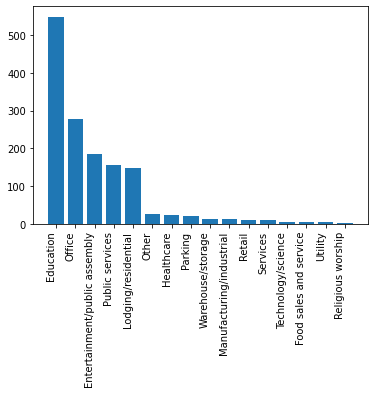

In [20]:
import matplotlib.pyplot as plt

anzahlen = t_gebaeude["primary_use"].value_counts()
plt.bar( anzahlen.index, anzahlen.values )
plt.xticks(rotation=90, ha='right')
plt.savefig("balkendiagramm.pdf")
plt.show()

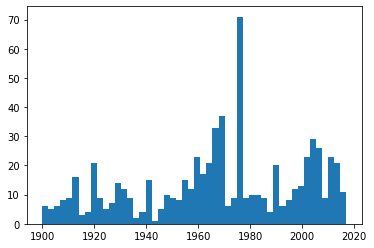

In [14]:
plt.hist( t_gebaeude["year_built"], bins=50 )
plt.show()

In [15]:
t_gebaeude["floor_count"].value_counts()

1.0     109
2.0      67
4.0      37
3.0      33
5.0      25
6.0      25
8.0      19
7.0      14
9.0       8
11.0      5
10.0      4
12.0      2
13.0      2
16.0      1
14.0      1
21.0      1
26.0      1
19.0      1
Name: floor_count, dtype: int64

## Wetterdaten

In [16]:
t_wetter = pandas.read_csv(verzeichnis + "/weather_train.csv")

In [18]:
t_wetter

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


# Analyse #1: Verbrauchen große Gebäude auch mehr Strom?

In [60]:
t_stromzaehler = t_zaehler.query("meter==0")
t_stromzaehler

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [61]:
t_stromverbrauch_pro_gebaeude = pandas.pivot_table(data=t_stromzaehler, columns="building_id").transpose()
t_stromverbrauch_pro_gebaeude

,meter,meter_reading
building_id,,
0,0.0,146.454978
1,0.0,74.865393
2,0.0,14.551385
3,0.0,235.549966
4,0.0,976.556746
...,...,...
1444,0.0,7.482127
1445,0.0,4.732815
1446,0.0,3.592162


In [62]:
t_stromverbrauch_pro_gebaeude.describe()

,meter,meter_reading
count,1413.0,1413.000000
mean,0.0,169.801041
std,0.0,334.307017
min,0.0,0.000400
25%,0.0,26.393591
50%,0.0,71.222191
75%,0.0,171.028523
max,0.0,4650.168481


In [63]:
t_gebaeude

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [64]:
t_stromverbrauch_pro_gebaeude = t_stromverbrauch_pro_gebaeude.join(t_gebaeude, on="building_id")
t_stromverbrauch_pro_gebaeude

,meter,meter_reading,site_id,building_id,primary_use,square_feet,year_built,floor_count
building_id,,,,,,,,
0,0.0,146.454978,0,0,Education,7432,2008.0,NaN
1,0.0,74.865393,0,1,Education,2720,2004.0,NaN
2,0.0,14.551385,0,2,Education,5376,1991.0,NaN
3,0.0,235.549966,0,3,Education,23685,2002.0,NaN
4,0.0,976.556746,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...,...,...
1444,0.0,7.482127,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,0.0,4.732815,15,1445,Education,4298,NaN,NaN
1446,0.0,3.592162,15,1446,Entertainment/public assembly,11265,1997.0,NaN


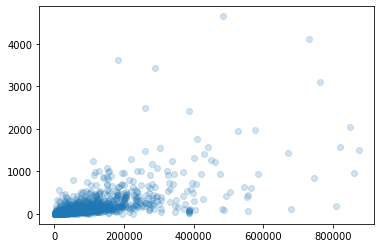

In [65]:
plt.scatter( t_stromverbrauch_pro_gebaeude["square_feet"], t_stromverbrauch_pro_gebaeude["meter_reading"], alpha=.2 )
plt.show()

Fazit: man kann nicht pauschal sagen: um so größer ein Gebäude, um so mehr Strom verbraucht es!

In [66]:
t_stromverbrauch_pro_gebaeude.corr()

,meter,meter_reading,site_id,building_id,square_feet,year_built,floor_count
meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meter_reading,NaN,1.000000,0.026400,0.018986,0.620161,0.116423,0.408985
site_id,NaN,0.026400,1.000000,0.977197,0.086960,-0.190646,-0.471119
building_id,NaN,0.018986,0.977197,1.000000,0.078600,-0.233495,-0.484977
square_feet,NaN,0.620161,0.086960,0.078600,1.000000,0.110153,0.537979
year_built,NaN,0.116423,-0.190646,-0.233495,0.110153,1.000000,0.100369
floor_count,NaN,0.408985,-0.471119,-0.484977,0.537979,0.100369,1.000000


In [67]:
t_stromverbrauch_pro_gebaeude["strom_pro_square_feet"] = t_stromverbrauch_pro_gebaeude["meter_reading"] / t_stromverbrauch_pro_gebaeude["square_feet"]

In [68]:
t_stromverbrauch_pro_gebaeude

,meter,meter_reading,site_id,building_id,primary_use,square_feet,year_built,floor_count,strom_pro_square_feet
building_id,,,,,,,,,
0,0.0,146.454978,0,0,Education,7432,2008.0,NaN,0.019706
1,0.0,74.865393,0,1,Education,2720,2004.0,NaN,0.027524
2,0.0,14.551385,0,2,Education,5376,1991.0,NaN,0.002707
3,0.0,235.549966,0,3,Education,23685,2002.0,NaN,0.009945
4,0.0,976.556746,0,4,Education,116607,1975.0,NaN,0.008375
...,...,...,...,...,...,...,...,...,...
1444,0.0,7.482127,15,1444,Entertainment/public assembly,19619,1914.0,NaN,0.000381
1445,0.0,4.732815,15,1445,Education,4298,NaN,NaN,0.001101
1446,0.0,3.592162,15,1446,Entertainment/public assembly,11265,1997.0,NaN,0.000319


In [69]:
t_stromverbrauch_pro_gebaeude["strom_pro_qm"] = t_stromverbrauch_pro_gebaeude["strom_pro_square_feet"] / 10.7639

In [70]:
t_stromverbrauch_pro_gebaeude

,meter,meter_reading,site_id,building_id,primary_use,square_feet,year_built,floor_count,strom_pro_square_feet,strom_pro_qm
building_id,,,,,,,,,,
0,0.0,146.454978,0,0,Education,7432,2008.0,NaN,0.019706,0.001831
1,0.0,74.865393,0,1,Education,2720,2004.0,NaN,0.027524,0.002557
2,0.0,14.551385,0,2,Education,5376,1991.0,NaN,0.002707,0.000251
3,0.0,235.549966,0,3,Education,23685,2002.0,NaN,0.009945,0.000924
4,0.0,976.556746,0,4,Education,116607,1975.0,NaN,0.008375,0.000778
...,...,...,...,...,...,...,...,...,...,...
1444,0.0,7.482127,15,1444,Entertainment/public assembly,19619,1914.0,NaN,0.000381,0.000035
1445,0.0,4.732815,15,1445,Education,4298,NaN,NaN,0.001101,0.000102
1446,0.0,3.592162,15,1446,Entertainment/public assembly,11265,1997.0,NaN,0.000319,0.000030


In [71]:
t_stromverbrauch_pro_gebaeude.describe()

,meter,meter_reading,site_id,building_id,square_feet,year_built,floor_count,strom_pro_square_feet,strom_pro_qm
count,1413.0,1413.000000,1413.000000,1413.000000,1413.000000,663.000000,352.000000,1.413000e+03,1.413000e+03
mean,0.0,169.801041,6.842180,714.958953,92204.792640,1968.170437,3.738636,2.131230e-03,1.979979e-04
std,0.0,334.307017,4.985376,418.115709,111412.340117,31.026539,3.336731,3.184903e-03,2.958874e-04
min,0.0,0.000400,0.000000,0.000000,283.000000,1900.000000,1.000000,1.053265e-08,9.785158e-10
25%,0.0,26.393591,3.000000,353.000000,22949.000000,1949.500000,1.000000,7.712532e-04,7.165184e-05
50%,0.0,71.222191,5.000000,706.000000,57673.000000,1970.000000,3.000000,1.349575e-03,1.253798e-04
75%,0.0,171.028523,13.000000,1073.000000,115288.000000,1995.500000,5.000000,2.335003e-03,2.169291e-04
max,0.0,4650.168481,15.000000,1448.000000,875000.000000,2017.000000,26.000000,4.461315e-02,4.144701e-03


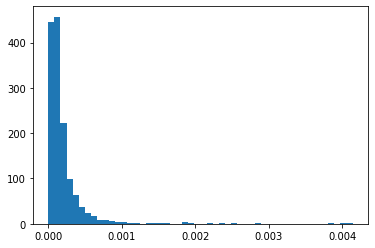

In [74]:
plt.hist( t_stromverbrauch_pro_gebaeude["strom_pro_qm"], bins=50 )
plt.show()

# Analyse #2: Welche Gebäudeart verbraucht am meisten Strom pro qm?

In [75]:
t_stromverbrauch_pro_gebaeude

,meter,meter_reading,site_id,building_id,primary_use,square_feet,year_built,floor_count,strom_pro_square_feet,strom_pro_qm
building_id,,,,,,,,,,
0,0.0,146.454978,0,0,Education,7432,2008.0,NaN,0.019706,0.001831
1,0.0,74.865393,0,1,Education,2720,2004.0,NaN,0.027524,0.002557
2,0.0,14.551385,0,2,Education,5376,1991.0,NaN,0.002707,0.000251
3,0.0,235.549966,0,3,Education,23685,2002.0,NaN,0.009945,0.000924
4,0.0,976.556746,0,4,Education,116607,1975.0,NaN,0.008375,0.000778
...,...,...,...,...,...,...,...,...,...,...
1444,0.0,7.482127,15,1444,Entertainment/public assembly,19619,1914.0,NaN,0.000381,0.000035
1445,0.0,4.732815,15,1445,Education,4298,NaN,NaN,0.001101,0.000102
1446,0.0,3.592162,15,1446,Entertainment/public assembly,11265,1997.0,NaN,0.000319,0.000030


In [77]:
t_stromverbrauch_nach_gebaeudeart = pandas.pivot_table(data=t_stromverbrauch_pro_gebaeude, columns="primary_use").transpose()
t_stromverbrauch_nach_gebaeudeart

,building_id,floor_count,meter,meter_reading,site_id,square_feet,strom_pro_qm,strom_pro_square_feet,year_built
primary_use,,,,,,,,,
Education,678.798883,4.745562,0.0,243.955782,6.277467,104080.847300,0.000199,0.002138,1962.711599
Entertainment/public assembly,707.636872,2.089286,0.0,115.423188,6.541899,80438.044693,0.000188,0.002027,1971.222222
Food sales and service,815.400000,NaN,0.0,94.784997,9.000000,38485.000000,0.000224,0.002406,2012.000000
Healthcare,965.476190,1.000000,0.0,297.200460,9.714286,137171.190476,0.000365,0.003926,1981.142857
Lodging/residential,725.793103,6.333333,0.0,107.397001,7.110345,85803.724138,0.000138,0.001481,1973.988095
Manufacturing/industrial,1057.100000,1.666667,0.0,89.378830,11.000000,45033.000000,0.000319,0.003435,1955.200000
Office,821.933086,3.725000,0.0,157.706777,8.572491,87329.457249,0.000190,0.002043,1973.095238
Other,678.120000,1.076923,0.0,67.647985,6.320000,31456.560000,0.000278,0.002992,1981.500000
Parking,528.227273,2.666667,0.0,57.334534,5.090909,279341.772727,0.000247,0.002659,1998.500000


In [79]:
t_stromverbrauch_nach_gebaeudeart.sort_values("strom_pro_qm", ascending=False)

,building_id,floor_count,meter,meter_reading,site_id,square_feet,strom_pro_qm,strom_pro_square_feet,year_built
primary_use,,,,,,,,,
Utility,920.000000,2.000000,0.0,161.868339,9.000000,31095.750000,0.001019,0.010971,1976.333333
Retail,363.545455,1.500000,0.0,138.680210,3.727273,39298.000000,0.000446,0.004799,1997.571429
Healthcare,965.476190,1.000000,0.0,297.200460,9.714286,137171.190476,0.000365,0.003926,1981.142857
Manufacturing/industrial,1057.100000,1.666667,0.0,89.378830,11.000000,45033.000000,0.000319,0.003435,1955.200000
Other,678.120000,1.076923,0.0,67.647985,6.320000,31456.560000,0.000278,0.002992,1981.500000
Technology/science,949.833333,5.000000,0.0,112.738960,9.666667,59176.333333,0.000270,0.002912,1939.000000
Parking,528.227273,2.666667,0.0,57.334534,5.090909,279341.772727,0.000247,0.002659,1998.500000
Food sales and service,815.400000,NaN,0.0,94.784997,9.000000,38485.000000,0.000224,0.002406,2012.000000
Public services,623.412903,2.048780,0.0,99.382442,5.380645,65116.806452,0.000199,0.002139,1964.333333


# Welche Gebäude sind Büros?

In [152]:
t_gebaeude.query("primary_use=='Office'")

,site_id,building_id,primary_use,square_feet,year_built,floor_count
9,0,9,Office,27000,2010.0,NaN
15,0,15,Office,83957,1974.0,NaN
17,0,17,Office,15250,1980.0,NaN
19,0,19,Office,18717,2004.0,NaN
21,0,21,Office,7043,1990.0,NaN
...,...,...,...,...,...,...
1381,15,1381,Office,84615,1963.0,NaN
1387,15,1387,Office,187041,1973.0,NaN
1410,15,1410,Office,11524,1994.0,NaN
1430,15,1430,Office,53303,1981.0,NaN


In [155]:
list(t_gebaeude.query("primary_use=='Office'")["building_id"])[0:5]

[9, 15, 17, 19, 21]

# Ein einzelnes Gebäude analysieren

In [156]:
t_gebaeude.query("building_id==9")

,site_id,building_id,primary_use,square_feet,year_built,floor_count
9,0,9,Office,27000,2010.0,NaN


In [157]:
ein_gebaeude = t.query("building_id==9")
ein_gebaeude

,building_id,meter,timestamp,meter_reading
9,9,0,2016-01-01 00:00:00,0.00
2310,9,0,2016-01-01 01:00:00,0.00
4603,9,0,2016-01-01 02:00:00,0.00
6902,9,0,2016-01-01 03:00:00,0.00
9198,9,0,2016-01-01 04:00:00,0.00
...,...,...,...,...
20209014,9,1,2016-12-31 21:00:00,0.00
20211378,9,0,2016-12-31 22:00:00,61.84
20211379,9,1,2016-12-31 22:00:00,0.00
20213744,9,0,2016-12-31 23:00:00,61.84


In [158]:
ein_gebaeude["meter"].nunique()

2

In [159]:
ein_gebaeude["meter"].unique()

array([0, 1])

In [160]:
ein_gebaeude.dtypes

building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object

In [161]:
ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )

/tmp/ipykernel_11079/1097137504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


In [162]:
ein_gebaeude.dtypes

building_id               int64
meter                     int64
timestamp        datetime64[ns]
meter_reading           float64
dtype: object

In [163]:
ein_gebaeude.set_index("timestamp", inplace=True)

In [164]:
ein_gebaeude

,building_id,meter,meter_reading
timestamp,,,
2016-01-01 00:00:00,9,0,0.00
2016-01-01 01:00:00,9,0,0.00
2016-01-01 02:00:00,9,0,0.00
2016-01-01 03:00:00,9,0,0.00
2016-01-01 04:00:00,9,0,0.00
...,...,...,...
2016-12-31 21:00:00,9,1,0.00
2016-12-31 22:00:00,9,0,61.84
2016-12-31 22:00:00,9,1,0.00


In [165]:
zeitreihe = ein_gebaeude.query("meter==0").loc["2016-01-01" : "2017-01-01"]["meter_reading"]
zeitreihe

timestamp
2016-01-01 00:00:00     0.0000
2016-01-01 01:00:00     0.0000
2016-01-01 02:00:00     0.0000
2016-01-01 03:00:00     0.0000
2016-01-01 04:00:00     0.0000
                        ...   
2016-12-31 19:00:00    61.4304
2016-12-31 20:00:00    61.4304
2016-12-31 21:00:00    63.0686
2016-12-31 22:00:00    61.8400
2016-12-31 23:00:00    61.8400
Name: meter_reading, Length: 8784, dtype: float64

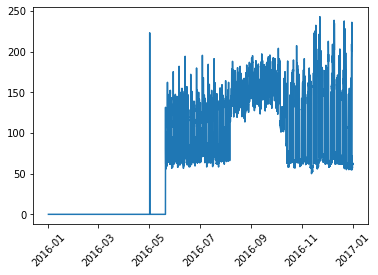

In [166]:
plt.plot(zeitreihe.index, zeitreihe.values)
plt.xticks(rotation=45)
plt.show()

In [177]:
l = list(t_gebaeude.query("primary_use=='Office'")["building_id"])[0:10]

for gebaeude_nr in l:
    print(gebaeude_nr)

9
15
17
19
21
25
26
28
32
38


/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


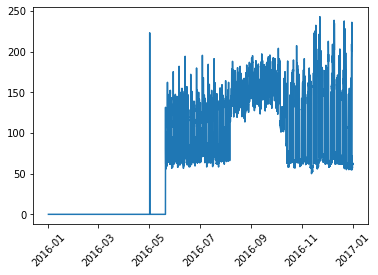

/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


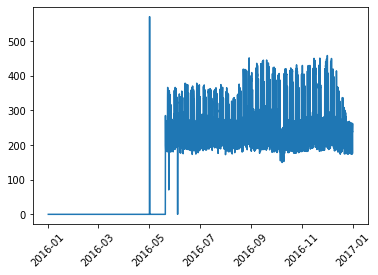

/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


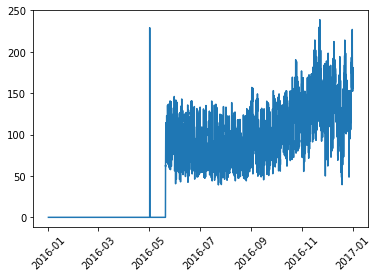

/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


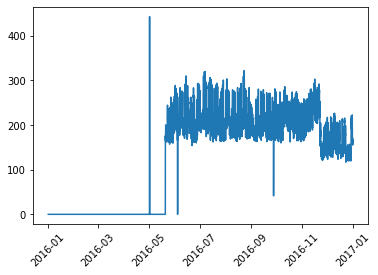

/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


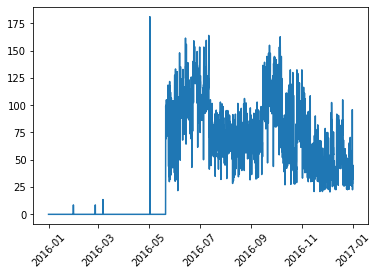

/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


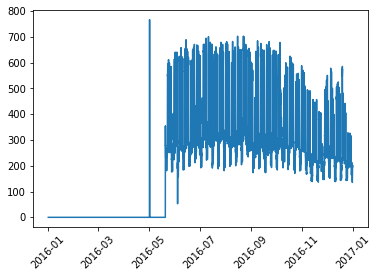

/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


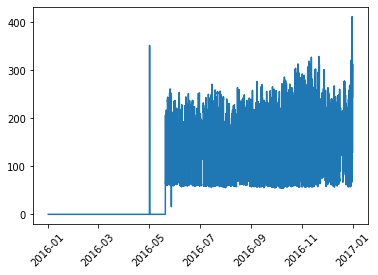

/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


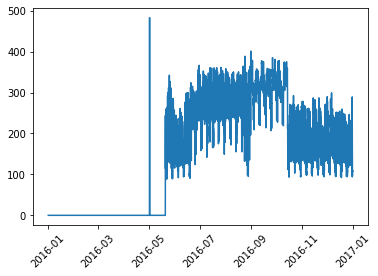

/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


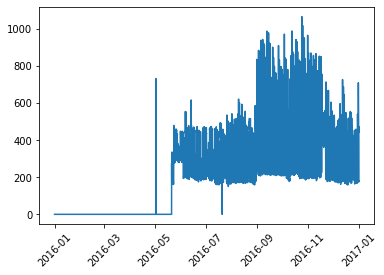

/tmp/ipykernel_11079/2722789821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )


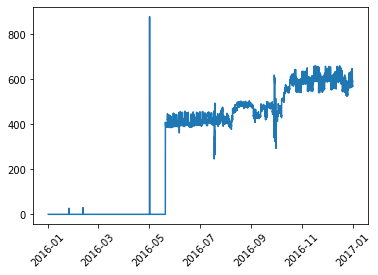

In [178]:
l = list(t_gebaeude.query("primary_use=='Office'")["building_id"])[0:10]

for gebaeude_nr in l:

    ein_gebaeude = t.query(f"building_id=={gebaeude_nr}")
    ein_gebaeude["timestamp"] = pandas.to_datetime( ein_gebaeude["timestamp"] )
    ein_gebaeude.set_index("timestamp", inplace=True)

    zeitreihe = ein_gebaeude.query("meter==0").loc["2016-01-01" : "2017-01-01"]["meter_reading"]

    plt.plot(zeitreihe.index, zeitreihe.values)
    plt.xticks(rotation=45)
    plt.show()

[9, 15, 17, 19, 21]